In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras



In [2]:
a=np.load("mnist.npz")                                   #loading the dataset and split it to train and test
test_x=np.array(a["x_test"])
test_y=np.array(a["y_test"])
train_x=np.array(a["x_train"])
train_y=np.array(a["y_train"])
print('X_train: ' + str(train_x.shape)) 
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))  #We can see that we have 60000 matrix that have 28 column and 28 row for train and 10000 for test 


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


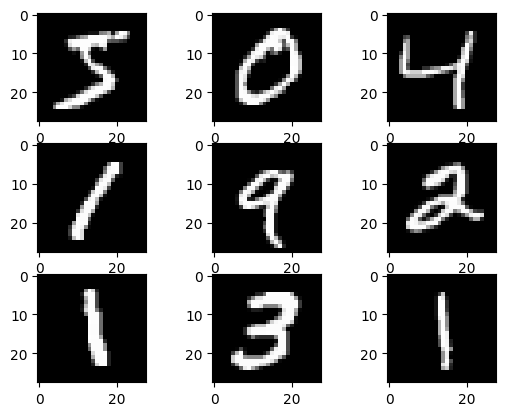

In [3]:
from matplotlib import pyplot                                    #we take a brief look to our data (imshow convrt a matrix to image and cmap is for the color of images)
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray')) 
pyplot.show()

5


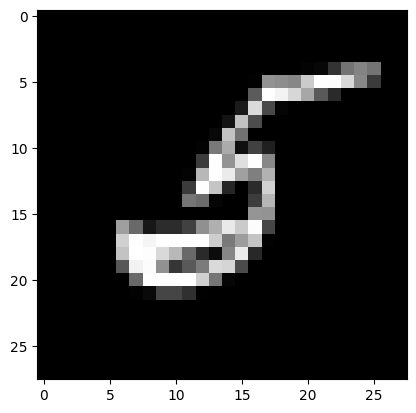

In [4]:
index=1111          #for another  example we can see 3(train[113]) and its label :
img=train_x[index]
print(train_y[index])
plt.gray()
plt.imshow(img)


In [5]:
#preprocessing: normalizing our data between 0 and 1 (because we dont want a data with a bigger number has more importance ):
np.min(img),np.max(img) #for finding min and max of our values and img is on of our samples(min=0 and max=255)
train_x=train_x/255.0     #dividing by 255 now all of our values are between 0 and 1
test_x=test_x/255.0



In [11]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(train_x,train_y, test_size=0.2, random_state=42)


In [6]:
model=keras.Sequential()      # with this method i ican define a sequential of layers for my NurealNetwork
model.add(keras.layers.Flatten())    #because our dataset is inot list(its images) im going to modify my dataset to a list with flattern()       
model.add(keras.layers.Dense(units=250,activation="relu"))
model.add(keras.layers.Dense(units=250,activation="relu"))
model.add(keras.layers.Dense(units=10,activation="softmax")) #this is output layer so unit is 10(0..9) and softmax is for modify my nearst answer to 1 in output matrix and other 0     


In [7]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

In [8]:
model.build(input_shape=(None,28,28))    #we can see a summary of our layers and nodes:
model.summary()   #flattern output is 784 because 28*28 dense parametrs is 1177750 because we have 784+1(bias) and 150 unit 785*150

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 250)               196250    
                                                                 
 dense_1 (Dense)             (None, 250)               62750     
                                                                 
 dense_2 (Dense)             (None, 10)                2510      
                                                                 
Total params: 261510 (1021.52 KB)
Trainable params: 261510 (1021.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
hist = model.fit(train_x,train_y, epochs=200,batch_size=256,validation_data=(x_validation,y_validation)) #training the mkodel with 100 epochs(how many times we train) and validation and batch size is for we giving a bach of data for train instead of 1

Epoch 1/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0359 - accuracy: 0.9895 - val_loss: 0.0421 - val_accuracy: 0.9866
Epoch 2/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0266 - val_accuracy: 0.9912
Epoch 3/200
235/235 [==============================] - 1s 4ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0139 - val_accuracy: 0.9951
Epoch 4/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0113 - val_accuracy: 0.9964
Epoch 5/200
235/235 [==============================] - 1s 4ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0068 - val_accuracy: 0.9977
Epoch 6/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0086 - val_accuracy: 0.9973
Epoch 7/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0155 - val_accuracy: 0.9947

In [17]:
y_test_pred=model.evaluate(test_x,test_y) #model predict on test data
y_test_pred

313/313 [==============================] - 0s 1ms/step - loss: 0.1861 - accuracy: 0.9836


[0.18605317175388336, 0.9836000204086304]

In [18]:
# Evaluate the model on the test set
y_test_pred_prob = model.predict(test_x)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)  # Convert probabilities to class labels



313/313 [==============================] - 0s 1ms/step


In [20]:
# Calculate precision, recall, and confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
precision = precision_score(test_y, y_test_pred, average='weighted')
recall = recall_score(test_y, y_test_pred, average='weighted')
conf_matrix = confusion_matrix(test_y, y_test_pred)
print(f"Precision on the test set: {precision:.4f}")
print(f"Recall on the test set: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Precision on the test set: 0.9836
Recall on the test set: 0.9836
Confusion Matrix:
[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1126    3    2    0    1    1    1    1    0]
 [   2    0 1019    1    1    0    1    4    4    0]
 [   0    0    4  996    0    3    0    2    1    4]
 [   1    0    4    0  964    0    2    2    1    8]
 [   2    0    0    8    1  875    1    1    3    1]
 [   3    2    1    1    5    5  939    0    2    0]
 [   1    3    5    0    0    0    0 1013    2    4]
 [   2    0    3    4    4    2    1    3  949    6]
 [   2    2    0    3    8    3    1    5    3  982]]


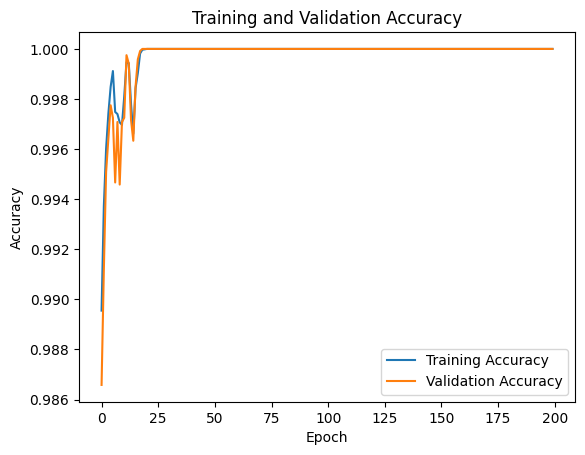

In [21]:

plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()